In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import random
from  flame_classification.flame_classification import FCA
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import seaborn as sns

Using TensorFlow backend.


In [ ]:
mpl.rcParams["font.family"] ='serif'
mpl.rcParams["font.size"] =14

In [2]:
### flame type data set
with h5py.File('../flame_classification/data//y_flames_classification.h5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data_y = list(f[a_group_key])

Keys: <KeysViewHDF5 ['Y_data']>


In [3]:
data_y.pop(0)

0

In [4]:
### image data set
with h5py.File('../flame_classification/data//x_flames_classification.h5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data_x = list(f[a_group_key])

Keys: <KeysViewHDF5 ['X_data']>


In [5]:
data_x.pop(0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x_data_gray = [FCA.normalize(arr) for arr in data_x]

In [7]:
c = list(zip(x_data_gray, data_y))

random.shuffle(c)

(x_data_gray, data_y) = zip(*c)

data_y = np.asarray(data_y).astype('uint8')

In [8]:
x_data_gray = np.asarray(x_data_gray).reshape(5910, 74, 74,1)

In [9]:
x_data_gray.shape

(5910, 74, 74, 1)

In [10]:
mm = int(len(x_data_gray) * 0.8)
nn = int(len(x_data_gray) * 0.9)

In [11]:
X_train = x_data_gray[:mm]
X_test = x_data_gray[mm:nn]
X_valid = x_data_gray[nn:]
y_train = data_y[:mm]
y_test = data_y[mm:nn]
y_valid = data_y[nn:]

In [12]:
mll = FCA.cl_model_load()

c:\users\navid\flame classification\flame_classification


In [13]:
y_pred = mll.predict_classes(X_test)

In [14]:
perc = (len(y_test) -
        sum([1 for i in range(len(y_test)) if abs(y_pred - y_test)[i] != 0
             ])) / len(y_test) * 100

In [15]:
print('{}% is the accuracy for the test dataset'.format(round(perc, 3)))

99.492% is the accuracy for the test dataset


In [44]:
val_predict = mll.predict_classes(X_valid)

In [49]:
y_valid_calss = np.argmax(y_valid, axis = 1)

In [51]:
val_conf_matrix = tf.math.confusion_matrix(labels=y_valid_calss, predictions=val_predict).numpy()
print(val_conf_matrix)

[[163   3   1]
 [  0 174  13]
 [  0   0 237]]


In [67]:
mpl.rcParams["font.family"] ='serif'
mpl.rcParams["font.size"] =14

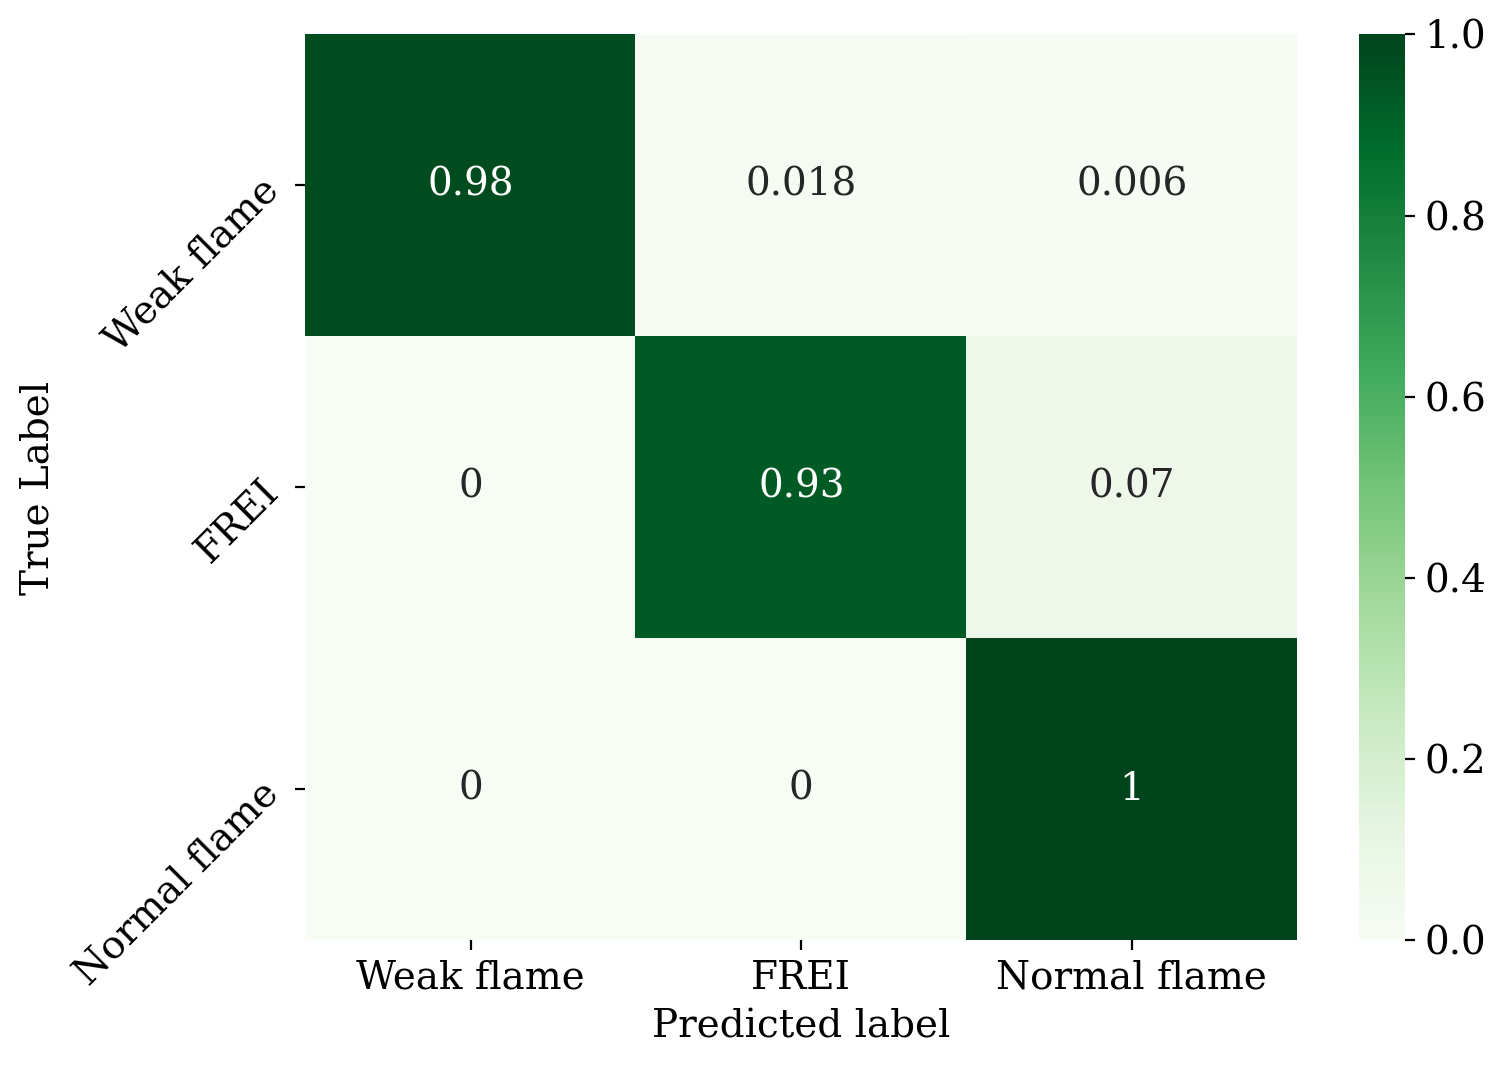

In [92]:
fig, ax = plt.subplots(figsize = (8,6), dpi=200)
val_conf_matrix = val_conf_matrix.astype('float') / val_conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens)
# ax.tight_layout()
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted label')

plt.setp(ax.yaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.show()